<a href="https://colab.research.google.com/github/Sergeichik/MLDM-2023/blob/main/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [2]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:00<00:00, 149.94it/s]


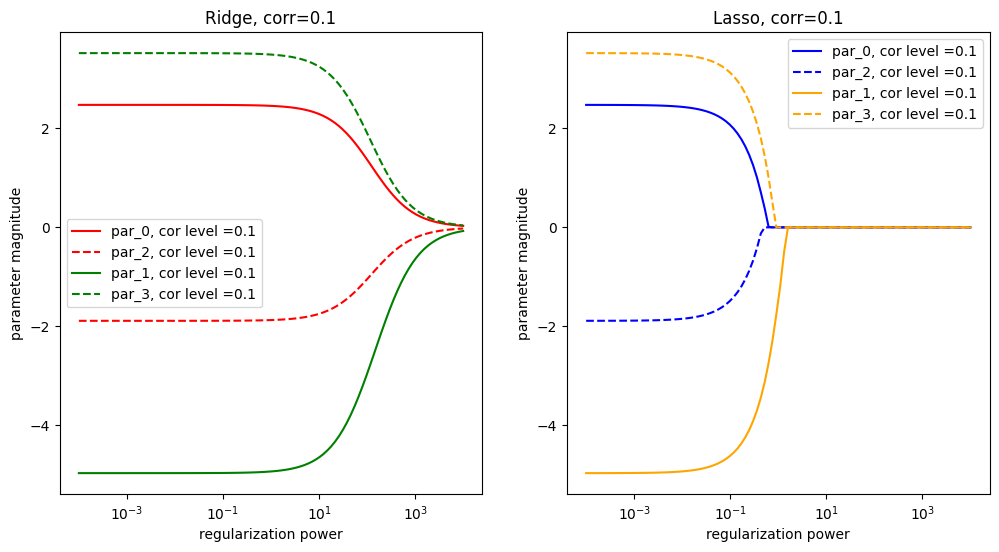

100%|██████████| 100/100 [00:00<00:00, 104.20it/s]


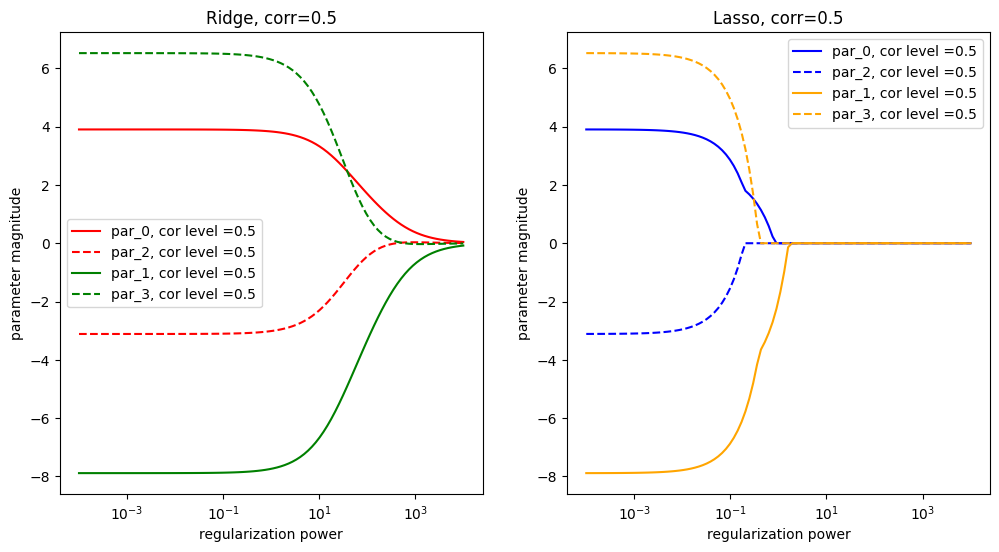

100%|██████████| 100/100 [00:01<00:00, 90.29it/s] 


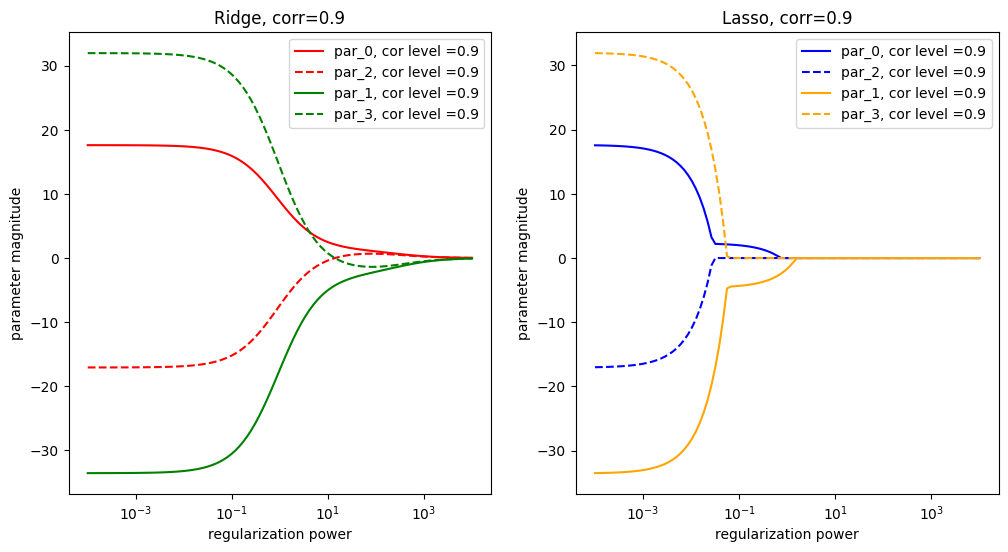

<Figure size 1200x600 with 0 Axes>

In [3]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    linear_model1 = Ridge(alpha=alpha)
    model1 = make_pipeline(
      #PolynomialFeatures(9, include_bias=False),
      linear_model1
    )
    model1.fit(X, y)

    params_ridge.append(
        linear_model1.coef_
    )
    linear_model2 = Lasso(alpha=alpha)
    model2 = make_pipeline(
      #PolynomialFeatures(9, include_bias=False),
      linear_model2
    )
    model2.fit(X, y)

    params_lasso.append(
        linear_model2.coef_
    )
  params_ridge = np.array(params_ridge)
  params_lasso = np.array(params_lasso)
  #print(params_ridge)
  plt.rcParams ['figure.figsize'] = [12, 6]
  plt.subplot(1, 2, 1)
  plt.plot(alpha_values, params_ridge[:,0], color='red', label = 'par_0, cor level ='+str(correlation));
  plt.plot(alpha_values, params_ridge[:,2], '--', color='red', label = 'par_2, cor level ='+str(correlation));
  plt.plot(alpha_values, params_ridge[:,1], color='green', label = 'par_1, cor level ='+str(correlation));
  plt.plot(alpha_values, params_ridge[:,3], '--', color='green', label = 'par_3, cor level ='+str(correlation));
  plt.xlabel("regularization power")
  plt.ylabel("parameter magnitude")
  plt.legend()
  plt.xscale('log')
  plt.title("Ridge, corr="+str(correlation))
  plt.subplot(1, 2, 2)
  plt.plot(alpha_values, params_lasso[:,0], color='blue', label = 'par_0, cor level ='+str(correlation));
  plt.plot(alpha_values, params_lasso[:,2], '--', color='blue', label = 'par_2, cor level ='+str(correlation));
  plt.plot(alpha_values, params_lasso[:,1], color='orange', label = 'par_1, cor level ='+str(correlation));
  plt.plot(alpha_values, params_lasso[:,3], '--', color='orange', label = 'par_3, cor level ='+str(correlation));
  plt.xlabel("regularization power")
  plt.ylabel("parameter magnitude")
  plt.legend()
  plt.xscale('log')
  plt.title("Lasso, corr="+str(correlation))
  plt.show()
  plt.clf()

My comment: We can observe that the increase in correlation level results in a faster dicrease rate of the parameter magnitude. Moreover, Lasso approaches zero with a smaller value of the regularization power. For Lasso a small "bump" can be observed for par_0 and par_1 when the correlation level > 0.5. It can be possibly explained by the fact that par_0 and par_1 are highly correlated with par_2 and par_3 respectively, which means that after zeroing of the par_2 (par_3) weights, the whole "impact" of the regularization goes to the par_0(par_1), and the rate slows down (one may notice that these "bumps" are at the same regularization power where the weights of par_2(par_3) are zero.

